# El hermoso mundo de la regresión lineal
Por: L. Johanna Lozano Lavao

## Lo simple es bello y bueno

El reciente auge del big data y el llamado data science ha llevado a una especie de menosprecio injusto hacia una de las técnicas más bellas y simples pero no menos poderosas del análisis de los datos como es la regresión lineal. Mucho se habla sobre algoritmos de complejo entrenamiento como las redes neuronales, y poco sobre la aún vigente regresión lineal: como si lo simple fuera inapropiado o como si nos diera pena ya seguir hablando de esta hermosa técnica de análisis de datos que cumple ya 216 años.

"Las ideas modernas sobre regresión se originan en los trabajo de Legendre y Gauss, sobre el método de mínimos cuadrados, para ajustar los datos sobre las órbitas de cuerpos celestes. El primer estudio documentado sobre el método de mínimos cuadrados, de donde deriva la idea de regresión es debido a Legendre (1752-1833) en 1805. Esta técnica de optimización intenta encontrar la función (dentro de una familia) que mejor se ajusta a los datos bivariantes, de acuerdo con el criterio de mínimo error cuadrático, y siempre que los datos cumplan algunas condiciones (como independencia). Se conocían las ecuaciones funcionales de estas órbitas, pero los errores de medida hacía que los cálculos fuesen aproximados y se ajustaban ciertas familias de funciones, usando la teoría de errores (y la distribución normal para describirlos)" (Estepa & Otros, 2012). En 1829 Gauss resuelve esto mediante lo que hoy se conoce como teorema Gauss-Markov. 

Sin embargo, mucho antes de que se desarrollasen las primeras ideas formales de la regresión y de sus condiciones habilitantes para hacer de este el mejor de los modelos lineales, Quetelet y otros biólogos y astrónomos entre la última década de 1700 y primeros años de 1800, empezaban a notar a través de ejercicios empíricos, una suerte de dependencia entre medidas antropométricas y variables como la edad, el sexo, entre otras. 

El modelo lineal denominado de regresión relaciona una variable dependiente, generalmente denominada como $Y$ con otras variables denominadas regresoras que se suponen independientes de la variable $Y$:

$$Y=B_o+B_1X_1+B_2X_2+...+B_jX_j$$

El problema de la regresión consiste en elegir unos valores determinados para los parámetros desconocidos $B _{j}$, de modo que la ecuación quede completamente especificada. Como se aprecia en la siguiente imagen, el algoritmo busca "el mejor ajuste posible" a través de la minimización de los parámetros de error o distancia promedia entre cada observación y la predicha por la línea ajustada. Este concepto aunque simple es bastante potente y ha demostrado servir para explicar múltiples fenómenos no sólo de la naturaleza sino también de las ciencias sociales.

![Concepto de la mejor línea posible](https://sitiobigdata.com/wp-content/uploads/2019/10/%C2%BFQu%C3%A9-es-la-regresi%C3%B3n-lineal-Parte-2.png)



## El problema de la discriminación planteado de forma simple

Una de las problemáticas de las ciencias sociales estudiadas a través de múltiples técnicas o algoritmos, incluida la regresión lineal, es la discriminación en el salario por razones de sexo. Muchos son los modelos que se han planteado al respecto los cuales han mostrado que esta cuestión no es tan simple de resolver, pues muchas mujeres efectivamente ganan menos que sus pares masculinos debido a discriminación estructural que las lleva a no aspirar a cargos directivos, a dedicar menos horas al crecimiento laboral (por tener que decidir entre su trabajo y su vida familiar), entre otros aspectos que no están relacionados con una discriminación directa por razones de sexo. 

Examinemos algunos datos ficticios de pago a hombres y mujeres según su edad, años de experiencia, cargo en la empresa y otras características. Sobre ellos, establezcamos un modelo de regresión lineal que permita observar la influencia real del género en el salario de los empleados.

In [4]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import os

In [5]:
Data = pd.read_csv('glassdoordata.csv')
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


Como se puede apreciar, la base de datos contiene no solo el género y la edad, sino también otras variables que se suponen que tienen relación con el salario como la educación, la experiencia y el performance. Nótese también cómo además del ingreso existe un bonus (posiblemente de desempeño) que debería ser considerado en el análisis de salarios de la compañía.

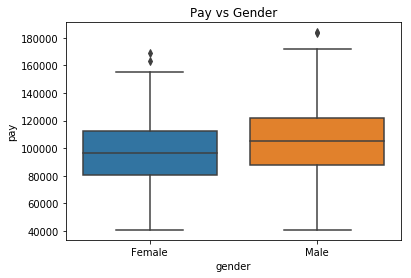

In [6]:
Data['pay'] = Data['income'] + Data['bonus']

sns.boxplot(x='gender', y = 'pay', data = Data) 
plt.title("Pay vs Gender");

En el anterior gráfico box-plot se puede apreciar un aparente salario más alto de los hombres en comparación con las mujeres, sin embargo, ¿es esto suficiente para afirmar que existe discriminación por sexo en el pago de la compañía? La respuesta es no y para ampliar esto hay que irse a la paradoja de Simpson según la cual, en palabras castizas, los análisis agregados pueden llevar a errores de interpretación de los datos. Es necesario un análisis más profundo. Revisemos a continuación la correlación entre las variables numéricas de la base de datos y la varible dependiente de pago.

In [8]:
corr_mat  = Data[['pay', 'age', 'seniority','performance']].corr()
corr_mat

,pay,age,seniority,performance
pay,1.000000,0.533715,0.530307,0.014155
age,0.533715,1.000000,-0.021414,-0.056875
seniority,0.530307,-0.021414,1.000000,-0.021127
performance,0.014155,-0.056875,-0.021127,1.000000


En el cuadro anterior se puede apreciar que el pago está relacionado con la edad y la experiencia y en menor medida con el performance de los empleados de la compañía. Incorporemos esas variables en un modelo de regresión lineal y analicemos sus coeficientes.

In [9]:
model4 = 'pay~jobtitle + age + performance + education + department + seniority + gender'
lm4    = sm.ols(formula = model4, data = Data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:30:04   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Es posible apreciar que si un empleado, cualquiera que sea su edad se hace un año más viejo, su pago se incrementa en 948.95 USD en promedio. Además, un año adicional de experiencia incrementan también el pago en 9903 USD mientras que el performance lo hace en 1156 USD. El coeficiente del género nos indica que efectivamente los hombres, en promedio, ganan 392.32 USD más que las mujeres, ceteris paribus las otras variables. Este, sin embargo, según su p-value no es un coeficiente significativo para el análisis.

## Concluyendo...

Los modelos lineales y en particular el modelo de regresión lineal, siguen siendo poderosos y valiosos en el análisis de múltiples problemáticas actuales y por lo tanto, no debe ser menospreciado ante el auge de las técnicas de machine learning.


## Bibliografía

Estepa & otros (2012). Algunas notas históricas sobre la correlación y regresión y su uso en el aula. En: Números, Volumen 81, noviembre de 2012, páginas 5-14. ISSN: 1887-1984

Sitio BigData. ¿Qué es la regresión lineal? https://sitiobigdata.com/2019/10/25/que-es-la-regresion-lineal/#:~:text=La%20regresión%20lineal%20es%20un,variables%20de%20predicción%20y%20respuesta%20.&text=La%20variable%20de%20respuesta%20se,se%20conoce%20como%20variable%20dependiente